# Understanding Eigen Values and Eigen Vectors through Visualization


## Generating Fake Data for various Algorithm Testing 

### Write a function to generate n points within a circle with center and radius as its Arguments

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# We will use parametric form of a circle to generate the circle
def genPointsInCircle(cx,cy,r,n):  # center co-ordinates, radius and no. of Points as its arguments
    theta = np.linspace(0,2*np.pi,n)
    x = cx+r*np.cos(theta)
    y = cy+r*np.sin(theta)
    
    plt.figure(figsize=(6,6))
    plt.axes().set_aspect('equal')
    plt.plot(x,y)
    xx = cx + np.random.uniform(0,r,n)*np.cos(theta)
    yy = cy + np.random.uniform(0,r,n)*np.sin(theta)
    plt.scatter(xx,yy,color='red',s=10)
    plt.show()

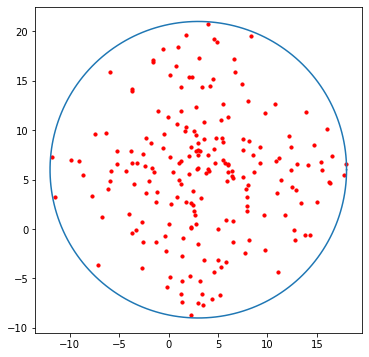

In [25]:
genPointsInCircle(3,6,15,200)

### Write a function to generate n points within an ellipse with center and major and minor axis as its Arguments

In [26]:
import numpy as np
import matplotlib.pyplot as plt
# We will use parametric form of a ellipse to generate the ellipse
def genPointsInEllipse(cx,cy,a,b,n): # center co-ordinates, major axis,minor axis and no. of Points as its arguments
    theta = np.linspace(0,2*np.pi,n)
    x = cx+a*np.cos(theta)
    y = cy+b*np.sin(theta)
    plt.figure(figsize=(6,6))
    plt.axes().set_aspect('equal')
    plt.plot(x,y)
    xx = cx + np.random.uniform(0,a,n)*np.cos(theta)
    yy = cy + np.random.uniform(0,b,n)*np.sin(theta)
    plt.scatter(xx,yy,color='red',s=10)
    plt.show()

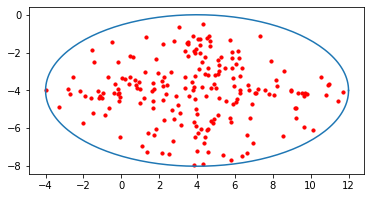

In [27]:
genPointsInEllipse(4,-4,8,4,200)

## Co-ordinate Transformation (Rotation)

The Rotation Matrix for a 2-dimensional system is given by the matrix $R$ where $\theta$ is the degree of rotation:
$$ R = \begin{pmatrix} \cos \theta & -\sin \theta\\ \sin \theta & \cos \theta \end{pmatrix}$$

### Write a function to generate points within a tilted ellipse with degree of rotation as its argument

In [28]:
import math
def genPointsInTiltedEllipse(cx,cy,a,b,n,theta):# center co-ordinates, major axis,minor axis and no. of Points, deg. of rotation
    center = np.array([cx,cy])
    theta = math.radians(theta) # Degree to Radians
    
    R = np.matrix([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]]) # Rotation Matrix
    
    t = np.linspace(0,2*np.pi,n)
    x = cx+a*np.cos(t)
    y = cy+b*np.sin(t)
    xx = cx + np.random.uniform(0,a,n)*np.cos(t)
    yy = cy + np.random.uniform(0,b,n)*np.sin(t)
    bound = np.vstack((x,y))
    points = np.vstack((xx,yy))
    new_center = R.dot(center)
    for i in range(n):
        bound[:,i] = R.dot(bound[:,i])
        points[:,i] = R.dot(points[:,i])
    return bound,points,new_center

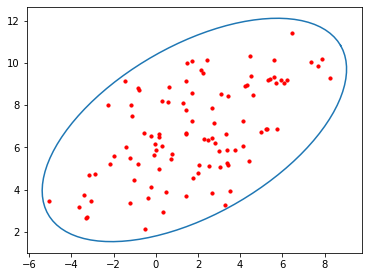

In [45]:
cx = 5
cy = 5
bound,points,new_center = genPointsInTiltedEllipse(cx,cy,8,4,100,30)
np.savetxt("Points.csv",points.T,delimiter=',')
plt.figure(figsize=(6,6))
plt.axes().set_aspect('equal')
plt.plot(bound[0,:],bound[1,:])
plt.scatter(points[0,:],points[1,:],color='red',s=10)
plt.show()

In [46]:
new_center

matrix([[1.83012702, 6.83012702]])

## Visualization of Eigen Values and Vectors 

### Compute the Co-Variance Matrix from the generated points and get the Eigen Value and Eigen Vector. Show them in a Plot. 

In [47]:
from numpy import linalg as LA
C = np.cov(points)          # computing the co-variance matrix from the points 
values,vectors = LA.eig(C)  # computing the eigen values and eigen vectors from co-variance matrix

In [48]:
C.shape

(2, 2)

In [49]:
values

array([10.79709075,  2.57080876])

In [50]:
vectors

array([[ 0.84598422, -0.53320794],
       [ 0.53320794,  0.84598422]])

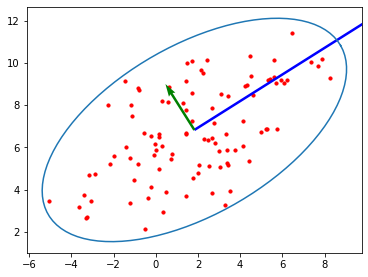

In [51]:
X = np.array((new_center[0,0]))
Y = np.array((new_center[0,1]))
U1 = np.array((vectors[0,0]*values[0]))
V1 = np.array((vectors[1,0]*values[0]))
U2 = np.array((vectors[0,1]*values[1]))
V2 = np.array((vectors[1,1]*values[1]))
plt.figure(figsize=(6,6))
plt.axes().set_aspect('equal')
plt.plot(bound[0,:],bound[1,:])
plt.scatter(points[0,:],points[1,:],color='red',s=10)
plt.quiver(X,Y,U1,V1,color=['b'],units='xy',scale=1)   ## show vector
plt.quiver(X,Y,U2,V2,color=['g'],units='xy',scale=1)
plt.show()

---

### Spectrum of Eigen Values

C:\anaconda\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\anaconda\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


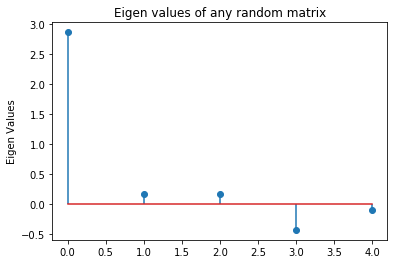

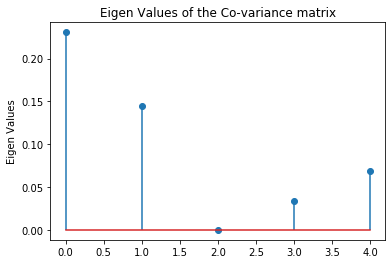

In [56]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
M = np.random.rand(5,5)
C = np.cov(M)
values1,vectors1 = LA.eig(M)
values2,vectors2 = LA.eig(C)
plt.figure()
plt.title("Eigen values of any random matrix")
plt.ylabel("Eigen Values")
plt.stem(values1,use_line_collection=True)
plt.show()
plt.figure()
plt.title("Eigen Values of the Co-variance matrix")
plt.ylabel("Eigen Values")
plt.stem(values2,use_line_collection=True)
plt.show()

## Revisiting some important properties of Eigen Vectors and Eigen Values 

Matrix decompositions are a useful tool for reducing a matrix to their constituent parts in order to simplify a range of more complex operations.

Perhaps the most used type of matrix decomposition is the eigendecomposition that decomposes a matrix into eigenvectors and eigenvalues. This decomposition also plays a role in methods used in machine learning, such as in the the Principal Component Analysis method or PCA.

This tutorial is divided into 5 parts; they are:
- Eigendecomposition of a Matrix
- Eigenvectors and Eigenvalues
- Calculation of Eigendecomposition
- Confirm an Eigenvector and Eigenvalue
- Reconstruct Original Matrix

### Eigen Decomposition of a Matrix

Eigendecomposition of a matrix is a type of decomposition that involves decomposing a square matrix into a set of eigenvectors and eigenvalues. A vector is an eigenvector of a matrix if it satisfies the following equation.
$$ A V = \lambda V $$

This is called the eigenvalue equation, where A is the parent square matrix that we are decomposing, v is the eigenvector of the matrix, and lambda is the lowercase Greek letter and represents the eigenvalue scalar.

A matrix could have one eigenvector and eigenvalue for each dimension of the parent matrix. Not all square matrices can be decomposed into eigenvectors and eigenvalues, and some can only be decomposed in a way that requires complex numbers. The parent matrix can be shown to be a product of the eigenvectors and eigenvalues.

$$ A = Q.diag(V).Q^{-1}$$

Where $ Q $ is a matrix comprised of the eigenvectors, $ diag(V) $ is a diagonal matrix comprised of the eigenvalues along the diagonal, and $ Q^-1 $ is the inverse of the matrix comprised of the eigenvectors.

A decomposition operation does not result in a compression of the matrix; instead, it breaks it down into constituent parts to make certain operations on the matrix easier to perform. Like other matrix decomposition methods, Eigendecomposition is used as an element to simplify the calculation of other more complex matrix operations.

### Eigen Vectors and Eigen Values

Eigenvectors are unit vectors, which means that their length or magnitude is equal to 1.0. They are often referred as right vectors, which simply means a column vector.

Eigenvalues are coefficients applied to eigenvectors that give the vectors their length or magnitude. For example, a negative eigenvalue may reverse the direction of the eigenvector as part of scaling it.


A matrix that has only positive eigenvalues is referred to as a positive definite matrix, whereas if the eigenvalues are all negative, it is referred to as a negative definite matrix.

### Calculation of Eigen Decomposition

An eigendecomposition is calculated on a square matrix using an efficient iterative algorithm, of which we will not go into the details.

Often an eigenvalue is found first, then an eigenvector is found to solve the equation as a set of coefficients.

The eigendecomposition can be calculated in NumPy using the eig() function.

The example below first defines a 3×3 square matrix. The eigendecomposition is calculated on the matrix returning the eigenvalues and eigenvectors.

In [57]:
# eigendecomposition
from numpy import array
from numpy.linalg import eig
# define matrix
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(A)
# calculate eigendecomposition
values, vectors = eig(A)
print("Eigen Values: ",values)
print("Eigen Vectors: ")
print(vectors)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
Eigen Values:  [ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
Eigen Vectors: 
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]


### Confirm an Eigenvector and Eigenvalue

We can confirm that a vector is indeed an eigenvector of a matrix.

We do this by multiplying the candidate eigenvector by the eigenvector and comparing the result with the eigenvalue.

First, we will define a matrix, then calculate the eigenvalues and eigenvectors. We will then test whether the first vector and value are in fact an eigenvalue and eigenvector for the matrix. We know they are, but it is a good exercise.

The eigenvectors are returned as a matrix with the same dimensions as the parent matrix, where each column is an eigenvector, e.g. the first eigenvector is vectors[:, 0]. Eigenvalues are returned as a list, where value indices in the returned array are paired with eigenvectors by column index, e.g. the first eigenvalue at values[0] is paired with the first eigenvector at vectors[:, 0].

In [65]:
# confirm eigenvector
from numpy import array
from numpy.linalg import eig
# define matrix
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
# calculate eigendecomposition
values, vectors = eig(A)
# confirm first eigenvector
B = A.dot(vectors[:, 1])
print(B)
C = vectors[:, 1] * values[1]
print(C)

[ 0.87764976  0.09688771 -0.68387434]
[ 0.87764976  0.09688771 -0.68387434]


### Reconstruct Original Matrix

We can reverse the process and reconstruct the original matrix given only the eigenvectors and eigenvalues.

First, the list of eigenvectors must be converted into a matrix, where each vector becomes a column. The eigenvalues need to be arranged into a diagonal matrix. The NumPy diag() function can be used for this.

Next, we need to calculate the inverse of the eigenvector matrix, which we can achieve with the inv() NumPy function. Finally, these elements need to be multiplied together with the dot() function.

In [66]:
# Reconstruct matrix
from numpy import diag
from numpy import dot
from numpy.linalg import inv
from numpy import array
from numpy.linalg import eig
# define matrix
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("Original Matrix:")
print(A)
# calculate eigenvectors and eigenvalues
values, vectors = eig(A)
# create matrix from eigenvectors
Q = vectors
# create inverse of eigenvectors matrix
R = inv(Q)
# create diagonal matrix from eigenvalues
L = diag(values)
# reconstruct the original matrix
B = Q.dot(L).dot(R)
print("Reconstructed Matrix: ")
print(B)

Original Matrix:
[[1 2 3]
 [4 5 6]
 [7 8 9]]
Reconstructed Matrix: 
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
